# Lab 2 Evaluation

## Objectives of the practical work

The objective is to get hands on experience on the fundamental elements of neural networks:
 
 - perceptron architecture (linear regression)
 - loss function
 - empirical loss
 - gradient descent

For this we will implement from scratch the data-structure and algorithms to train a perceptron. Note that slides related to the perceptron and neural networks in general are available on [moodle](https://moodle.insa-toulouse.fr/course/view.php?id=1822#section-2).

## Dataset

The objective of the regression is the prediction of the hydrodynamic performance of sailing yachts from dimensions and velocity.
The **inputs** are linked to dimension and hydrodynamics characteristics:
1. Longitudinal position of the center of buoyancy
(*flottabilité*), adimensional.
2. Prismatic coefficient, adimensional.
3. Length-displacement ratio, adimensional.
4. Beam -draught ratio ((*tiran d’eau*), adimensional.
5. Length-beam ratio, adimensional.
6. Froude number, adimensional

**Target value/predicted value (Output)** = Residuary resistance per unit weight of
displacement, adimensional

In [2]:
# Import some useful libraries and functions

import numpy as np
import pandas

def print_stats(dataset):
    """Print statistics of a dataset"""
    print(pandas.DataFrame(dataset).describe())


In [3]:
# Download the data set and place in the current folder (works on linux only)
filename = 'yacht_hydrodynamics.data'

import os.path
import requests

if not os.path.exists(filename):
    print("Downloading dataset...")
    r = requests.get('https://arbimo.github.io/tp-supervised-learning/tp2/' + filename)
    open(filename , 'wb').write(r.content)
    
print('Dataset available')

Dataset available


### Explore the dataset

- How many examples are there in the dataset?
  ***There are 308 examples in the dataset (308 rows)***
- How many features for each example?
  ***There are 6 features (7 columns), the right-most column being the result of each example***
- What is the ground truth of the 10th example?
  ***The ground truth of this example is 1.83***

In [4]:
# loads the dataset and slip between inputs (X) and ground truth (Y)
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1] # examples features
Y = dataset[:, -1]  # ground truth

# Print the first 5 examples
for i in range(0,5):
    print(f"f({X[i]}) = {Y[i]}")

f([-5.    0.6   4.78  4.24  3.15  0.35]) = 8.62
f([-5.     0.565  4.77   3.99   3.15   0.15 ]) = 0.18
f([-2.3    0.565  4.78   5.35   2.76   0.15 ]) = 0.29
f([-5.     0.6    4.78   4.24   3.15   0.325]) = 6.2
f([0.    0.53  4.78  3.75  3.15  0.175]) = 0.59


The following command adds a column to the inputs.

- What is in the value added this column? ***The column added only contains ones.***
- Why are we doing this? ***This value represents the "w0" in the formula of the affine function: y = w0 + x1w1 +x2w2 + ... + xnwn. This value needs to be initialized and will be changed afterwards (with the evolution of the algorithm). It avoids having only linear functions, as we want affine functions.***

In [5]:
X = np.insert(X, 0, np.ones((len(X))), axis= 1)
print_stats(X)

           0           1           2           3           4           5  \
count  308.0  308.000000  308.000000  308.000000  308.000000  308.000000   
mean     1.0   -2.381818    0.564136    4.788636    3.936818    3.206818   
std      0.0    1.513219    0.023290    0.253057    0.548193    0.247998   
min      1.0   -5.000000    0.530000    4.340000    2.810000    2.730000   
25%      1.0   -2.400000    0.546000    4.770000    3.750000    3.150000   
50%      1.0   -2.300000    0.565000    4.780000    3.955000    3.150000   
75%      1.0   -2.300000    0.574000    5.100000    4.170000    3.510000   
max      1.0    0.000000    0.600000    5.140000    5.350000    3.640000   

                6  
count  308.000000  
mean     0.287500  
std      0.100942  
min      0.125000  
25%      0.200000  
50%      0.287500  
75%      0.375000  
max      0.450000  


## Creating the perceptron

![Perceptron for regression](https://arbimo.github.io/tp-supervised-learning/tp2/perceptron-regression.png)

We now want to define a perceptron, that is, a function of the form: 

$h_w(x) = w_0 + w_1 \times x_1 + \dots + w_n \times x_n$

- Complete the code snippet below to:
  - create the vector of weight `w`
  - implement the `h` function that evaluate an example based on the vector of weights
  - check if this works on a few examples

In [6]:
w = np.zeros(7)

def h(w, x):
    sum = 0
    for i in range(0,len(x)-1):
        sum+=x[i]*w[i]
    return sum
X = dataset[:, :-1] # examples features
Y = dataset[:, -1]  # ground truth

# print the ground truth and the evaluation of h_w on the first example
print("--First example-- \nground truth:", Y[0], "\nevaluation of h_w:", h(w, X[0]))

--First example-- 
ground truth: 8.62 
evaluation of h_w: 0.0


## Loss function

Complete the definiton of the loss function below such that, for a **single** example `x` with ground truth `y`, it returns the $L_2$ loss of $h_w$ on `x`.

In [7]:
"""def loss(w, x, y):
    h=np.full(len(y),h(w,x))
    L=(y-h)**2 #L2(a,b)=(a-b)^2
    return L"""
def loss(w, x, y):
    return (y-h(w,x))**2 #L2(a,b)=(a-b)^2

## Empirical loss

Complete the function below to compute the empirical loss of $h_w$ on a **set** of examples $X$ with associated ground truths $Y$.

In [8]:
def emp_loss(w, X, Y):
    return sum(loss(w,X,Y)/len(X))

## Gradient update

A gradient update is of the form: $w \gets w + dw$

- Complete the function below so that it computes the $dw$ term (the 'update') based on a set of examples `(X, Y)` the step (`alpha`)

If you are not sure about the gradient computation, check out the [perceptron slides](https://moodle.insa-toulouse.fr/pluginfile.php/120391/mod_resource/content/1/cm1.pdf) on [Moodle](https://moodle.insa-toulouse.fr/course/view.php?id=1822) (in particular, slide 26). Make sure this computation is clear to you!

In [9]:
def compute_update(w, X, Y, alpha):
    dw = np.zeros(len(w))
    for i in range(0,len(w)-1):
        sum=0
        for j in range(0,len(X)-1):
            sum+=(Y[j]-h(w,X[j]))*X[j][i]
        dw[i]=sum*alpha
    return dw
   
compute_update(w, X, Y, alpha = 10e-7)

array([-0.00754539,  0.00181636,  0.01543604,  0.01266542,  0.01033756,
        0.00130721,  0.        ])

## Gradient descent

Now implement the gradient descent algorithm that will:

- repeatedly apply an update the weights 
- stops when a max number of iterations is reached (do not consider early stopping for now)
- returns the final vector of weights

In [10]:
def descent(w_init, X, Y, alpha, max_iter):
    w=np.copy(w_init)
    for i in range(0,max_iter):
        for j in range (0,len(w)):
            w[j]=w[j]+compute_update(w, X, Y, alpha)[j]
    return w

## Exploitation

You gradient descent is now complete and you can exploit it to train your perceptron.

- Train your perceptron to get a model.
- Visualize the evolution of the loss on the training set. Has it converged?
- Try training for several choices of `alpha` and `max_iter`. What seem like a reasonable choice?
- What is the loss associated with the final model?
- Is the final model the optimal one for a perceptron?

In [31]:
from matplotlib import pyplot as plt
import statistics

#Function that constructs plots based on a parameter and the impact of that parameter on weights
def construct_plt(X,Y,parameter,x_axis):
    weights=[]
    if x_axis=='alpha':
        for i in parameter:
            weights.append(statistics.mean(descent(w_init,X,Y,i,10)))
    else:
        for i in parameter:
            weights.append(statistics.mean(descent(w_init,X,Y,10e-7,i)))
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(parameter,weights)
    plt.xlabel(x_axis)
    plt.ylabel("Weights")
    plt.title("Impact of "+x_axis+" on the weights")
    plt.show()


Text(0, 0.5, 'f(examples)')

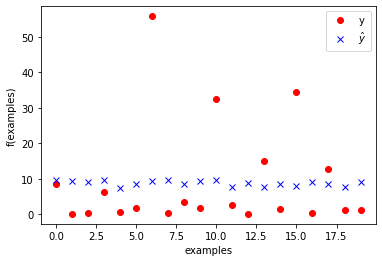

In [32]:
# Code sample that can be used to visualize the difference between the ground truth and the prediction
import matplotlib.pyplot as plt

num_samples_to_plot = 20

w_init = np.zeros(7)
w_init = descent(w_init, X, Y, 10e-7, 100)
yw = [h(w_init,x) for x in X]

plt.plot(Y[0:num_samples_to_plot], 'ro', label='y')
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')

plt.legend()
plt.xlabel("examples")
plt.ylabel("f(examples)")


In [77]:
def data_analysis(X,Y):

    print("--Variation of alpha--")
    print("alpha = 10e-9, max_iter=10\n", descent(w_init,X,Y,10e-9,10))
    print("alpha = 10e-7, max_iter=10\n", descent(w_init,X,Y,10e-7,10))
    print("alpha = 10e-5, max_iter=10\n", descent(w_init,X,Y,10e-5,10))
    print("alpha = 10e-3, max_iter=10\n", descent(w_init,X,Y,10e-3,10))
    print("alpha = 10, max_iter=10\n", descent(w_init,X,Y,10,10))

    #Impact of alpha on the weights (the Y axis represents an average on the values in w)
    alphas=[10,10e-3,10e-5,10e-7,10e-9]
    construct_plt(X,Y,alphas,'alpha')

    print("\n--Variation of max_iter--")
    print("alpha = 10e-7, max_iter=1\n", descent(w_init,X,Y,10e-7,1))
    print("alpha = 10e-7, max_iter=10\n", descent(w_init,X,Y,10e-7,10))
    print("alpha = 10e-7, max_iter=100\n", descent(w_init,X,Y,10e-7,100))

    #Impact of max_iter on the weights (the Y axis represents an average on the values in w)
    max_iters=[1,10,100]
    construct_plt(X,Y,max_iters,'max_iter')

--Variation of alpha--
alpha = 10e-9, max_iter=10
 [-0.34763724  0.08879903  0.75424922  0.61075211  0.49998496  0.08283799
  0.        ]
alpha = 10e-7, max_iter=10
 [-0.35738105  0.09196409  0.78109179  0.63202307  0.51787477  0.08821476
  0.        ]
alpha = 10e-5, max_iter=10
 [-0.17778506  0.13814448  1.1612859   0.64198327  0.5812752   0.4698692
  0.        ]
alpha = 10e-3, max_iter=10
 [-1.16443292e+42 -4.53017091e+42 -8.59374488e+41  4.92280598e+43
 -1.85996578e+45  5.09138026e+45  0.00000000e+00]
alpha = 10, max_iter=10
 [ 2.11365715e+195  8.72308259e+198 -7.22623854e+202  4.19376422e+207
 -1.61858023e+212  4.57615122e+215  0.00000000e+000]


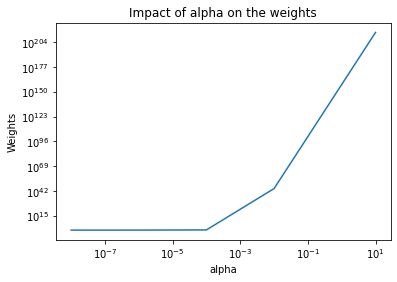


--Variation of max_iter--
alpha = 10e-7, max_iter=1
 [-0.34861797  0.08910848  0.75687405  0.61283557  0.50173125  0.08333744
  0.        ]
alpha = 10e-7, max_iter=10
 [-0.35738105  0.09196409  0.78109179  0.63202307  0.51787477  0.08821476
  0.        ]
alpha = 10e-7, max_iter=100
 [-0.38273495  0.10614863  0.90108278  0.72377575  0.59856458  0.12978413
  0.        ]


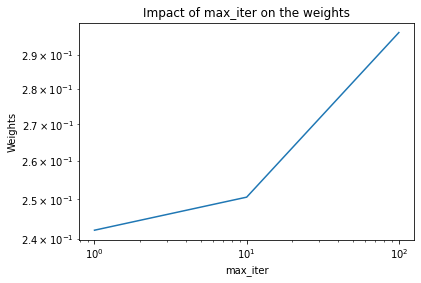

Wall time: 29.1 s


In [78]:
%%time
data_analysis(X,Y)





# Going further

The following are extensions of the work previously done. If attempting them **do not modify** the code you produced above so that it can be evaluated.

### Improvements to gradient descent

Consider improving the gradient descent with:

 - Stochastic Gradient Descent (SGD), which means selecting a subset of the examples for training
 - Detection of convergence to halt the algorithm before the maximum number of iterations


***The Stochastic Gradient Descent algorithm is an improvement over the basic Gradient Descent algorithm in terms of computation time. Indeed, by selecting only a subset of the examples studied, the calculations could be significantly reduced. The subset is selected randomly so it is supposed to represent the dataset well.***<br>
***Note: Stochastic means Random***
<br><br>
***There are two simple ways to proceed. Either we select random points of the dataset every time we calculate the descent (each time the w vector is updated) with less iterations than the original algorithm, or we could make a smaller randomized copy of the dataset and work with that instead. The second solution being the simplet, that's how we're going to proceed***

--Variation of alpha--
alpha = 10e-9, max_iter=10
 [-0.3475289   0.08876478  0.75396079  0.61052132  0.49979044  0.08278425
  0.        ]
alpha = 10e-7, max_iter=10
 [-0.34757867  0.08877996  0.75429885  0.61079168  0.50000215  0.08298763
  0.        ]
alpha = 10e-5, max_iter=10
 [-0.34733539  0.08882634  0.77560282  0.62675333  0.51153197  0.10243245
  0.        ]
alpha = 10e-3, max_iter=10
 [1298.77547513    7.29510141   51.30919329 -136.50199669  241.09134696
  -22.7486349     0.        ]
alpha = 10, max_iter=10
 [ 1.86586243e+141  4.94880175e+143 -3.10284648e+146  1.35337215e+150
 -3.94089079e+153  8.64884771e+155  0.00000000e+000]


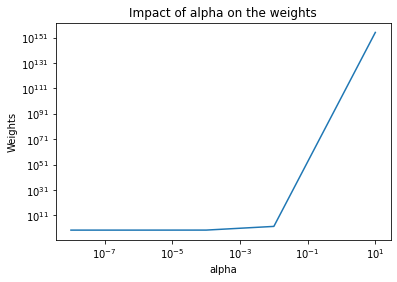


--Variation of max_iter--
alpha = 10e-7, max_iter=1
 [-0.3475335   0.08876618  0.75399169  0.61054603  0.4998098   0.08280275
  0.        ]
alpha = 10e-7, max_iter=10
 [-0.34757867  0.08877996  0.75429885  0.61079168  0.50000215  0.08298763
  0.        ]
alpha = 10e-7, max_iter=100
 [-0.34795954  0.08889789  0.75720181  0.61311144  0.50181248  0.08482625
  0.        ]


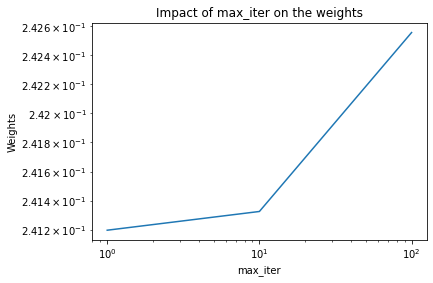

Wall time: 3.56 s


In [72]:
%%time

#We have 308 examples in X. Let's make it 25 random examples
import random
alphas=[10,10e-3,10e-5,10e-7,10e-9]
max_iters=[1,10,100]
X = dataset[:, :-1] # examples features
Y = dataset[:, -1]  # ground truth
randX=[]
randY=[]

for i in range (0,25):
    rand=random.choice(dataset)
    randX.append(rand[:-1])
    randY.append(rand[-1])
#Analysis
data_analysis(randX,randY)


***The plots seem to be fairly similar. Also, we can see that we went from an execution time of 29.1 s to 3.56 s***

### Data normalization

Different input features can have different units, and very different ranges.
Within the perceptron computation, these values will be summed together.
While gradient descent is normally able to deal with this (by adapting the weights of the perceptron for each input feature), standardizing the input features usually eases the perceptron training, and can sometimes improve accuracy.




```python
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(copy=True) 
X_normalized = sc.fit_transform(X)
```

Try applying a standard normalization to the input features (make sure that you keep a feature column that is always equal to 1). Is the convergence faster ? Try to quantify this speed-up. What about accuracy ?

--Variation of alpha--
alpha = 10e-9, max_iter=10
 [-0.34750864  0.08874549  0.75391451  0.61049049  0.49976324  0.08315943
  0.        ]
alpha = 10e-7, max_iter=10
 [-0.34555614  0.08685457  0.74968134  0.60771628  0.49728986  0.12050591
  0.        ]
alpha = 10e-5, max_iter=10
 [-0.17559484 -0.0717234   0.40906515  0.38557284  0.30352044  3.85503133
  0.        ]
alpha = 10e-3, max_iter=10
 [    1622.28134335  -789807.02358651 -6048991.22599967  8059014.83841763
 15108168.61347719    65891.68198657        0.        ]
alpha = 10, max_iter=10
 [-3.23386959e+101 -1.55930611e+103 -1.87547142e+105  2.20362880e+108
  2.57234088e+111  1.95283231e+112  0.00000000e+000]


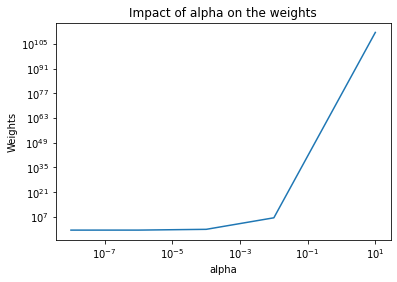


--Variation of max_iter--
alpha = 10e-7, max_iter=1
 [-0.34733089  0.08857328  0.7535288   0.61023778  0.49953787  0.08655457
  0.        ]
alpha = 10e-7, max_iter=10
 [-0.34555614  0.08685457  0.74968134  0.60771628  0.49728986  0.12050591
  0.        ]
alpha = 10e-7, max_iter=100
 [-0.3280805   0.07000407  0.71214173  0.58305756  0.47536969  0.46001816
  0.        ]


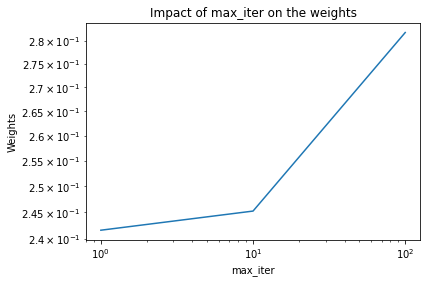

Wall time: 29.4 s


In [82]:
%%time

from sklearn.preprocessing import StandardScaler
sc = StandardScaler(copy=True) 
X_normalized = sc.fit_transform(X)
#Analysis
data_analysis(X_normalized,Y)

***By comparing the execution time of the two cells, the Data Normalization on X seems to have no impact on the speed on the convergence***